<a href="https://colab.research.google.com/github/ebudd45/Meteorology-Projects/blob/main/reanalysis_sounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install needed modules

!pip install sounderpy
!pip install cdsapi

In [2]:
import sounderpy as spy
import cdsapi


## ---------------------------------- SOUNDERPY ----------------------------------- ##
##          Vertical Profile Data Retrieval and Analysis Tool For Python            ##
##                      v3.0.8 | Jan 2025 | (C) Kyle J Gillett                      ##
##                 Docs: https://kylejgillett.github.io/sounderpy/                  ##
## --------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------ ##



In [3]:
#Use is using ERA5 Reanaysis data
uid = 261492
apikey = "d49b15eb-e8f6-44e5-adee-63179d3f018e"

with open("/root/.cdsapirc", "w") as f:
    print("url: https://cds.climate.copernicus.eu/api/v2", file=f)
    print(f"key: {uid}:{apikey}", file=f)

In [10]:
#Reanalysis data

model = 'rap'
latlon = [40.48, -86.20]
year = '2016'
month = '09'
day = '24'
hour = '12'
#data = spy.get_model_data(model, latlon, year, month, day, hour, dataset=None, box_avg_size=0.10, hush=False)
data = spy.get_model_data(model,latlon, year, month, day, hour)

> RAP REANALYSIS DATA ACCESS FUNCTION
  -----------------------------------------
    > DATASET USED: RAP_25km_anl_old
    > COMPLETE --------
    > RUNTIME: 00:00:06
    > SUMMARY: 12Z RAP F00 for[40.48, -86.2] at 09-24-2016-12Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 0.0 | MUCAPE: 63.4 | MLCAPE: 0.0 | MUECAPE: --
    --- MU 0-3: 0.0 | MU 0-6: 58.5 | SB 0-3: 0.0 | SB 0-6: 0.0
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 15.1 knot | 0-500 SWV: 0.006 | 0-500 SHEAR: 1.1 | 0-500 SRH: 4.5
    --- 1-3km SRW: 15.9 knot | 1-3km SWV: 0.001 | 1-3km SHEAR: 5.0 | | 1-3km SRH: 16.7
 


In [ ]:
#Modekl data
# Declare a BUFKIT site ID, forecast model, & forecast hour

site_id = 'kmop'
model_name = 'hrrr'
forecast_hour = 6

data = spy.get_bufkit_data(model_name, site_id, forecast_hour)

> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00
> SUMMARY: 01Z HRRR F06 for KMOP, MOUNT PLEASANT at 02-25-2024-07Z
 
> THERMODYNAMICS --------------------------------------------- 
--- SBCAPE: 0.0 | MUCAPE: 0.0 | MLCAPE: 0.0 | ECAPE: --
--- MU 0-3: 0.0 | MU 0-6: 0.0 | SB 0-3: 0.0 | SB 0-6: 0.0
 
> KINEMATICS ------------------------------------------------- 
--- 0-500 SRW: 24.6 knot | 0-500 SWV: 0.025 | 0-500 SHEAR: 24.2 | 0-500 SRH: 161.4
--- 1-3km SRW: 17.1 knot | 1-3km SWV: 0.002 | 1-3km SHEAR: 10.8 | | 1-3km SRH: -21.1
 


> SOUNDING PLOTTER FUNCTION
  ---------------------------------
- no radar data available -


    > COMPLETE --------
    > RUNTIME: 00:00:03


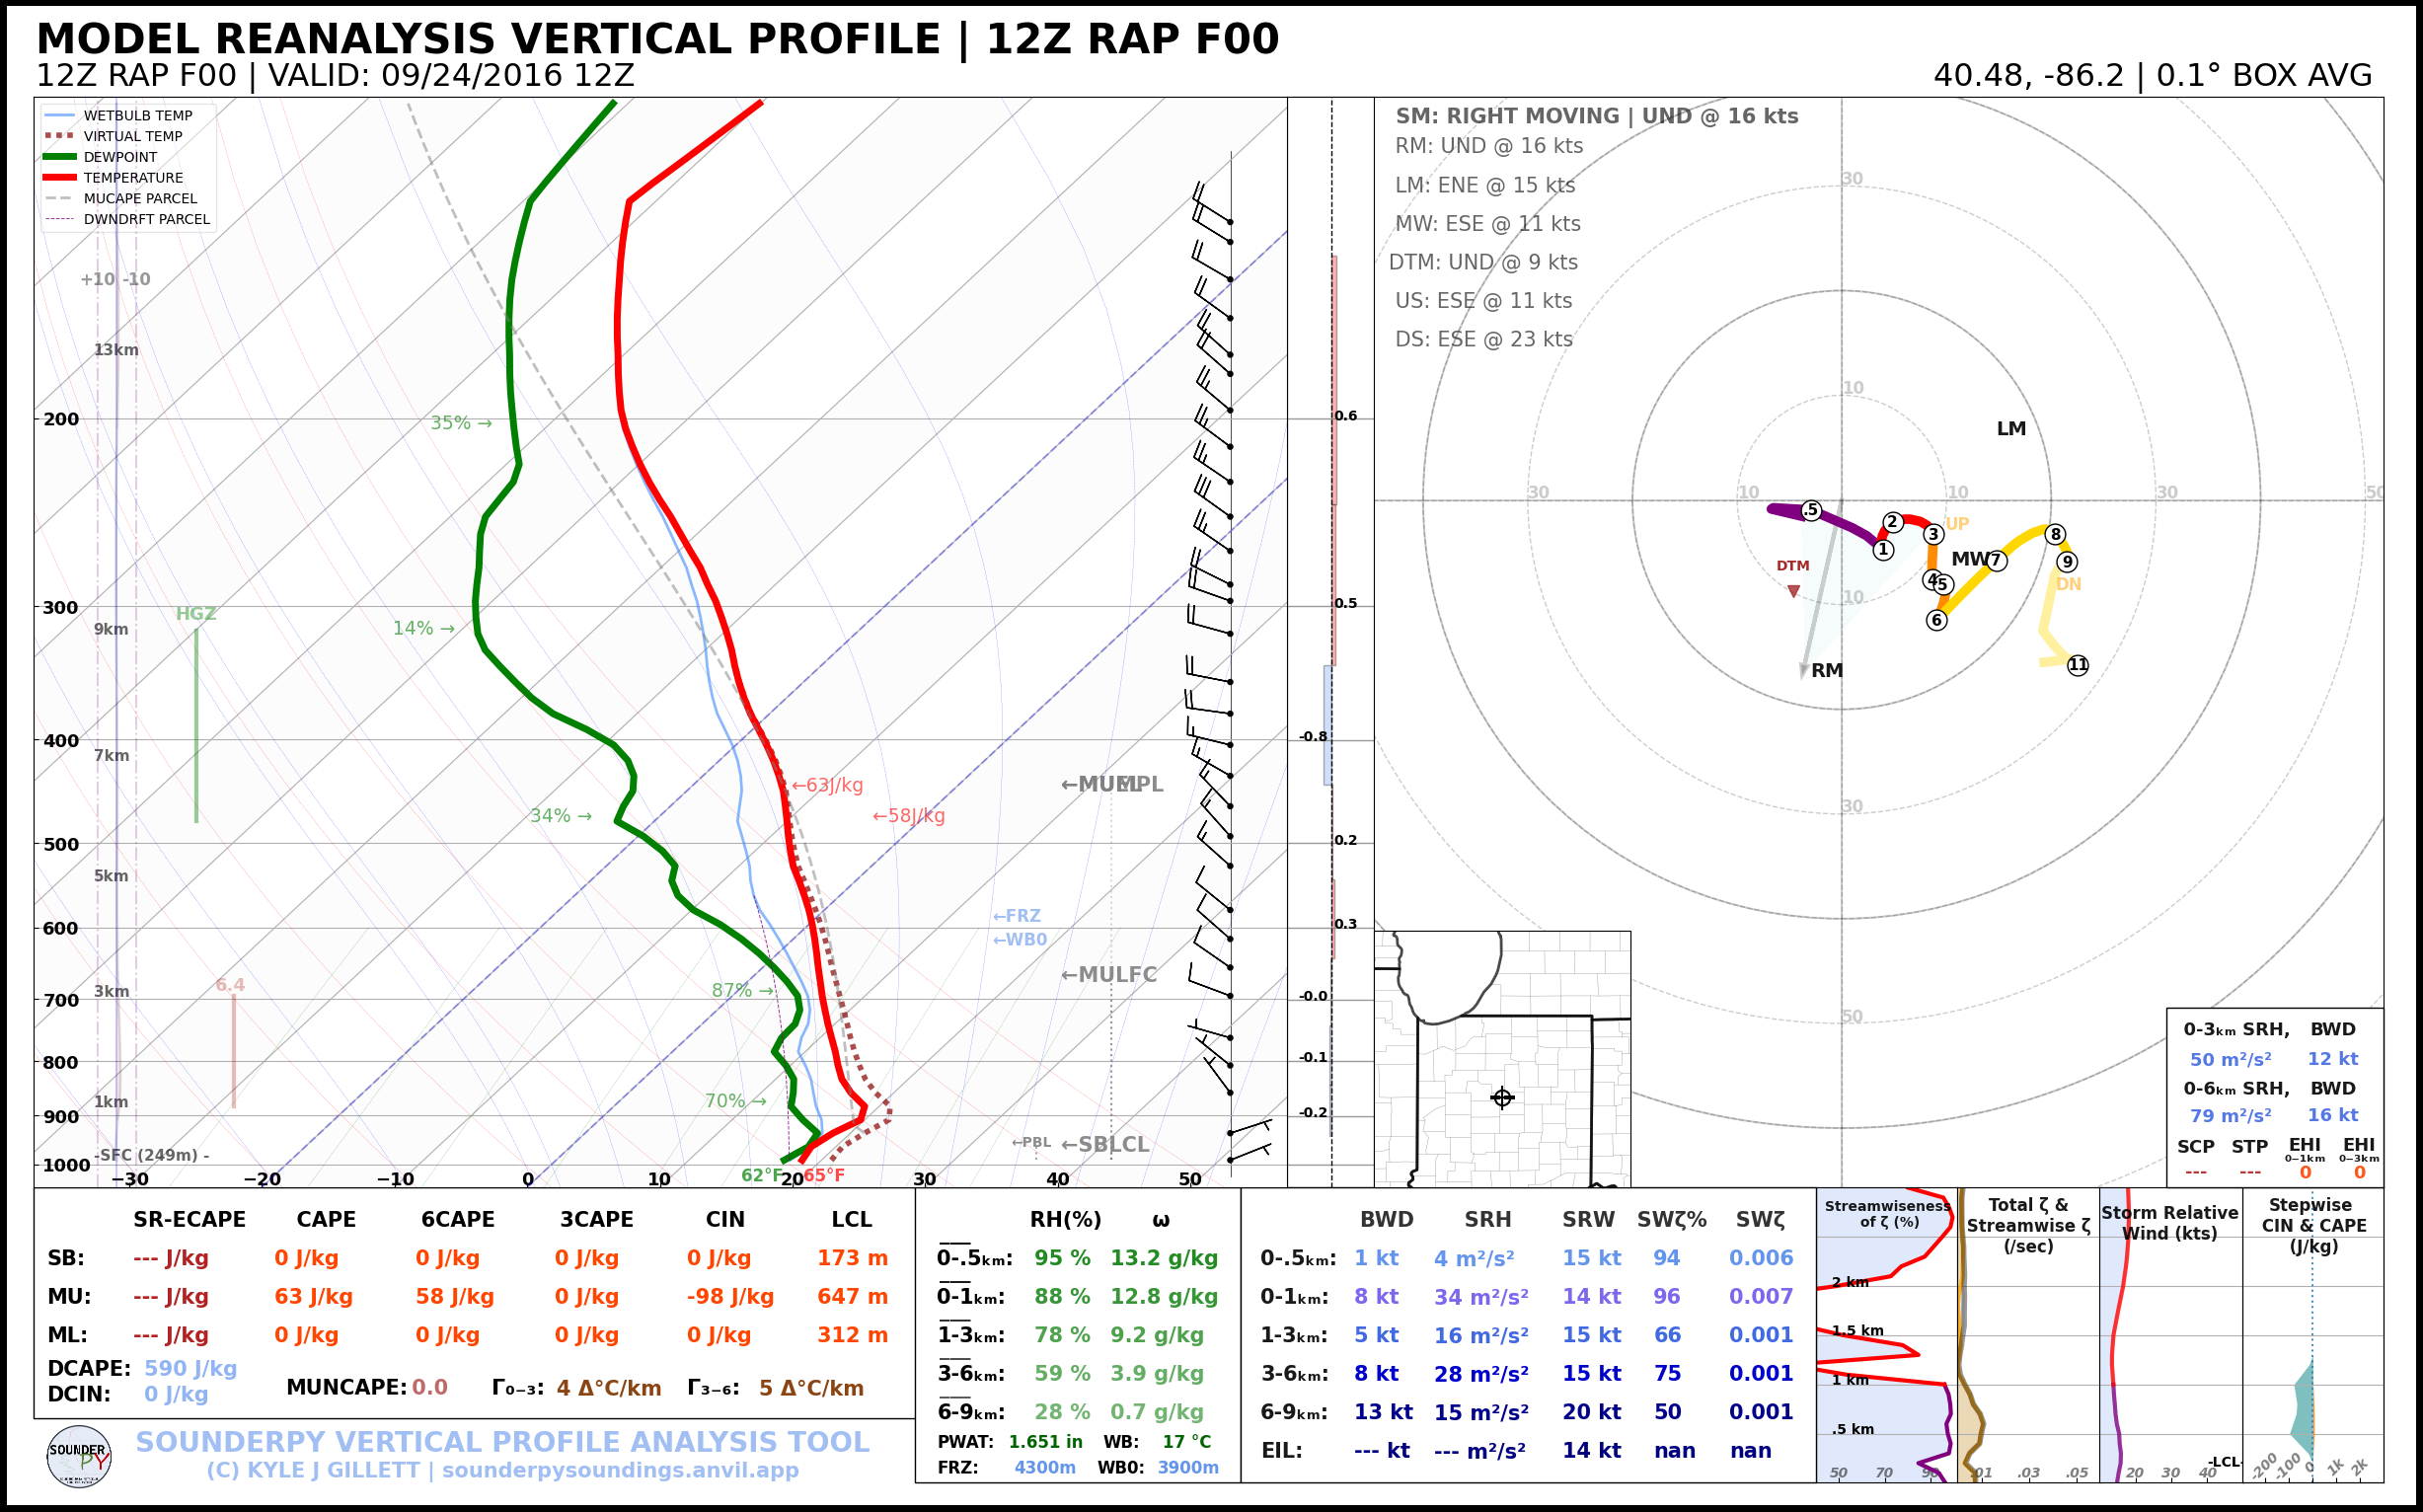

In [11]:
spy.build_sounding(data)